## Final Project Submission

Please fill out:
* Student name: Giovanni Rosati
* Student pace: part-time
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: TBD


In [1]:
# imports
import pandas as pd
import numpy as np
from numpy.random import normal

import scipy.stats as stats 
from scipy.stats import norm

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

# plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# make plots show in the notebook by default
%matplotlib inline

In [2]:
# import the dataset
initial_df = pd.read_csv("kc_house_data.csv")

In [3]:
initial_df.head(10) # initial inspection of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
initial_df.info() # get the # of records and a list of columns with data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# waterfront, view, and yr_renovated show missing values for some records

initial_df.describe() # summary stats for each column 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Question:
# Are there missing and/or null values that need to be dealt with?

# count the missing or null values in each column
nulls = initial_df.isnull().sum().sort_values(ascending=False)
nulls

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [7]:
# Answer:
# Three factors have null or missing values. They will all need to be addressed.

# yr_renovated has 3,842 nulls. Maybe this indicates a house has not been "officially" renovated.
# waterfront has 2,376 nulls. This may mean a house that does not have a view of a waterfront.
# view has 63 nulls. This may indicate a house that has not been viewed. The view nulls should 
# likely be assigned a zero or dealt with by deleting those records.

# looking closer at waterfront and view:
print("unique values in waterfront: {}".format(initial_df.waterfront.unique()))
print("unique values in view: {}".format(initial_df.view.unique()))

unique values in waterfront: [nan  0.  1.]
unique values in view: [ 0. nan  3.  4.  2.  1.]


In [8]:
# waterfront is a boolean factor, and 2,376 records have no data for this factor

# looking closer at view
np.unique(initial_df.view, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 array([19422,   330,   957,   508,   317,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1]))

In [9]:
## Because the null values in yr_renovated and waterfront each represent more than 10% of the records, 
# they may need to be dealt with.

# view is null in only 63 records out of over 20,000 bit I will likely convert the nulls to zero.
# Adding 63 null records to the already 19,422 records that have a value of zero should not significantly
# impact any findings. Alternatively, these 63 records could be deleted.


In [10]:
# the following factors could be converted to categorical:
# waterfront, zipcode

# view, condition, grade, bedrooms, bathrooms, and floors are ordered categorical variables and were left as-is

# yr_removated and yr_built could potentially be converted to a form that makes more sense.
# For example, yr_renovated could be converted to an integer that represents how many years ago the renovation 
# occurrred ( ie. 2018 - 2006 = 12). This may have a negative correlation with price, as I would expect that
# a more recent renovation would indicate a higher sales price. 

# Regarding data types, some values are integers or floats, and date is an object

# First step is to change date to pandas datetime
initial_df['date'] = pd.to_datetime(initial_df.date)  # cast string to pandas datetime format

# Then create a weekday factor for the day of the week and a month factor for the month. These are categorical.
initial_df['weekday'] = initial_df['date'].dt.dayofweek.astype('str') # make a new factor for the day of the week
initial_df['month'] = initial_df['date'].dt.month.astype("str") # make a new factor for the month

# factors to be changed to categorical
to_categorical = ['zipcode']

# sqft_basement is a string - convert to an int so it doesn't get automaticaly converted to a categorical factor
initial_df['sqft_basement'] = pd.to_numeric(initial_df['sqft_basement'], errors='coerce').fillna(0).astype(np.int64)

# loop through each categorical factor to make the values strings
for factor in to_categorical:
    initial_df[factor] = initial_df[factor].astype('str')

# create the categorical "bins" for the categorical factoes
initial_df = pd.get_dummies(initial_df)

# look at the new dataset
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 109 entries, id to month_9
dtypes: datetime64[ns](1), float64(8), int64(11), uint8(89)
memory usage: 5.1 MB


In [11]:
# the number of columns is now 109, up from 21 initially

# inspect all of the columns now. One column from each categorical factor will need to be deleted.
list(initial_df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcod

In [12]:
# dig deeper into yr_renovated values
# np.unique(initial_df.yr_renovated, return_counts=True)
print('unique values in yr_renovated: {}'.format(initial_df.yr_renovated.unique()))  # doesn't work ?

unique values in yr_renovated: [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [13]:
np.unique(initial_df.yr_renovated, return_counts=True)


(array([   0., 1934., 1940., ...,   nan,   nan,   nan]),
 array([17011,     1,     2, ...,     1,     1,     1]))

In [14]:
# convert the nans's to zero
initial_df['yr_renovated'].fillna(0, inplace=True)

In [15]:
print('unique values in yr_renovated: {}'.format(initial_df.yr_renovated.unique()))  # doesn't work ?

unique values in yr_renovated: [   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [16]:
#  print(initial_df['yr_renovated'].value_counts(normalize=True))
    
unique_yr_renovated = initial_df['yr_renovated'].value_counts()
unique_yr_renovated[:]

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [17]:
# cleaning up yr_renovated
# step 1: if yr_renovated = 0, replace the yr_renovated value with that record's yr_built value
initial_df.yr_renovated.replace(0.0, initial_df.yr_built, inplace = True)


In [18]:
initial_df['yr_renovated'].value_counts()

2014.0    632
2005.0    479
2006.0    473
2004.0    455
2003.0    450
2007.0    447
1977.0    417
1978.0    387
2008.0    382
1968.0    372
1979.0    349
1967.0    346
1990.0    338
1959.0    326
2001.0    320
1989.0    310
1987.0    305
1962.0    302
1954.0    293
1988.0    279
1999.0    278
1969.0    276
1994.0    263
1955.0    259
1998.0    254
2009.0    251
1947.0    250
1966.0    248
1976.0    248
2000.0    247
         ... 
1909.0     83
1922.0     78
1908.0     76
1919.0     76
1923.0     75
1900.0     74
1930.0     74
1916.0     73
1921.0     71
1912.0     68
1911.0     60
1905.0     59
1937.0     58
1931.0     57
1907.0     54
1915.0     53
1917.0     52
2015.0     52
1913.0     49
1914.0     46
1938.0     45
1903.0     43
1904.0     40
1936.0     35
1932.0     33
1901.0     28
1902.0     26
1933.0     24
1935.0     20
1934.0     15
Name: yr_renovated, Length: 116, dtype: int64

In [19]:
# step 2: add a new column: yrs_since_renovation = 2016 - yr_renovated
# This will create a value indicating how many years have passed since the home was renovated or in the 
# case of no renovation date, the value will be the date the house was constructed.
initial_df['yrs_since_renovation'] = 2016 - initial_df.yr_renovated

In [20]:
initial_df['yrs_since_renovation'].value_counts(ascending=True)

82.0      15
81.0      20
83.0      24
114.0     26
115.0     28
84.0      33
80.0      35
112.0     40
113.0     43
78.0      45
102.0     46
103.0     49
1.0       52
99.0      52
101.0     53
109.0     54
85.0      57
79.0      58
111.0     59
105.0     60
104.0     68
95.0      71
100.0     73
86.0      74
116.0     74
93.0      75
97.0      76
108.0     76
94.0      78
107.0     83
        ... 
16.0     247
50.0     248
40.0     248
69.0     250
7.0      251
18.0     254
61.0     259
22.0     263
47.0     276
17.0     278
28.0     279
62.0     293
54.0     302
29.0     305
27.0     310
15.0     320
57.0     326
26.0     338
49.0     346
37.0     349
48.0     372
8.0      382
38.0     387
39.0     417
9.0      447
13.0     450
12.0     455
10.0     473
11.0     479
2.0      632
Name: yrs_since_renovation, Length: 116, dtype: int64

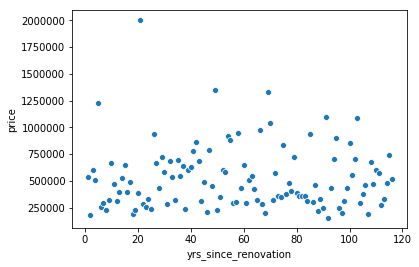

In [21]:
# Question:
# Is this new factor (yrs_since_renovation) correlated to price?

# Perform some EDA on this new factor

# from matplotlib documentation
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, 
#                           vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, 
#                           edgecolors=None, *, data=None, **kwargs)[source]

# get the values by the mean 
x = initial_df.yrs_since_renovation.groupby(initial_df.yrs_since_renovation).mean()
y = initial_df.price
sns.scatterplot(x, y)
plt.show()

In [22]:
# Answer:
# The scatter plot possibly indicates a slight negative correlation to price,
# a lower value "yrs_since_renovation" may help predict a higher price.


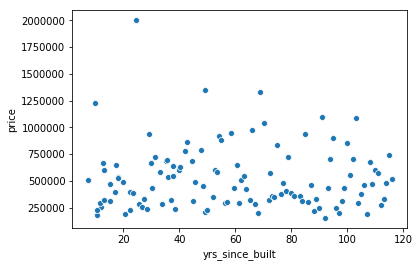

In [23]:
# Question:
# Would creating a similar factor for the years since construction correlate to price?


# modify yr_built in a similar fashion
initial_df['yrs_since_built'] = 2016 - initial_df.yr_built

# EDA on new factor, yrs_since_built

x = initial_df.yrs_since_built.groupby(initial_df.yrs_since_renovation).mean()
# x = initial_df.yrs_since_built
y = initial_df.price
sns.scatterplot(x, y)
plt.show()

In [24]:
# Answer:
# The scatter plot possibly indicates a slight negative correlation to price,
# a lower value "yrs_since_built" may help predict a higher price.


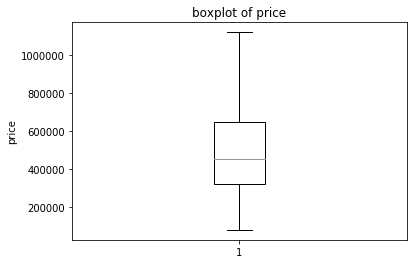

In [25]:
# Question:
# Should the target variable (price) be tuned?

# taking a look at the distribution of the target variable
plt.boxplot(initial_df["price"], 0, '')
plt.title('boxplot of price')
plt.ylabel('price')
plt.show()

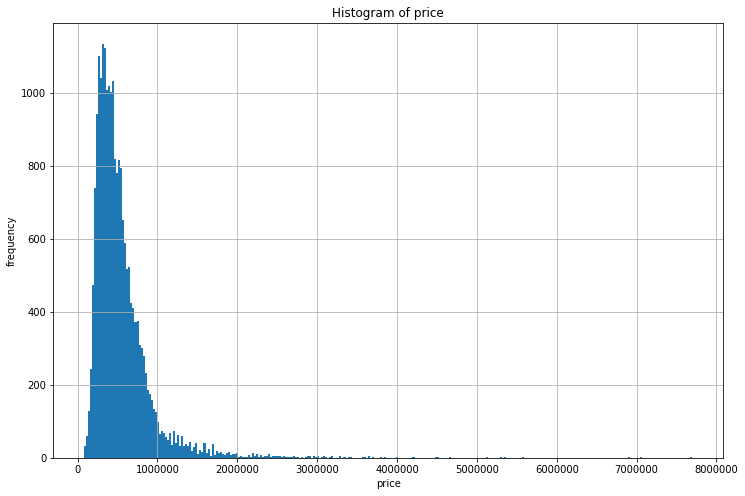

In [26]:
# The box plot shows that 50% of the values are roughly centered around the median, inidicating the 
# the distribution is somewhat normal, but the 75th percentile is further out from the mean than the 25th percentile.

# look at a histogram for price
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of price')
initial_df.price.hist(bins=300)

plt.show()

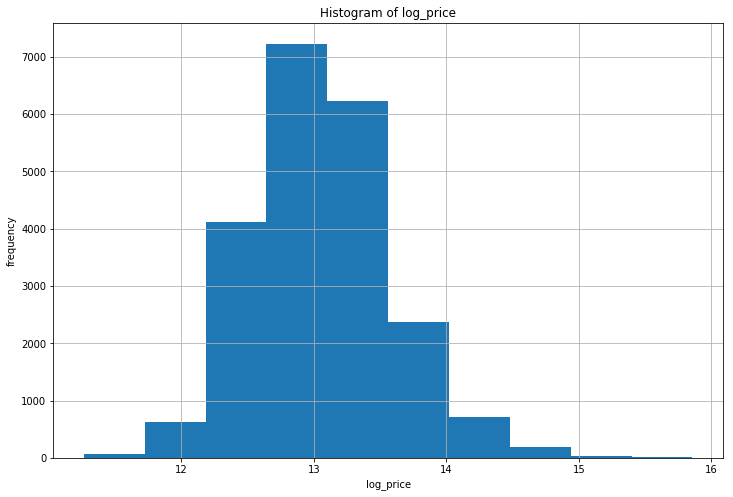

In [27]:
# The distribution of price is right skewed and shows some extreme outliers at the high end of the range. 
# This explains the boxplot.

# Answer:
# Because I am interested in "relative" changes to price, I will convert price to a log scale.
# My reasoning is as follows:
# A change of a home from $100,000 to $110,000 could be described as +$10,000 or +10%,
# A change of a home from $1,000,000 to $1,100,000 could be described as +$100,000 or +10%.
# I don't want differences in higher value homes to have a disproportionate impact.

# Convert price to a log scale in a new dataframe named df2
df2 = initial_df.assign(log_price = np.log(initial_df['price']))

# drop id and the original price columns
df2.drop('price', inplace=True, axis = 1)
df2.drop('id', inplace=True, axis = 1)

# plot a new histogram
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)

plt.xlabel('log_price')
plt.ylabel('frequency')
plt.title('Histogram of log_price')
df2.log_price.hist();


In [28]:
# After the log conversion, the histogram of price is much less skewed.
df2.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,yrs_since_renovation,yrs_since_built,log_price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,...,0.086818,0.103209,0.111775,0.100847,0.102375,0.089781,0.082002,43.054869,45.000324,13.048211
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,...,0.281574,0.304238,0.315096,0.301133,0.303148,0.285874,0.274374,28.945393,29.375234,0.526555
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.264464
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,19.000000,12.682307
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,41.000000,13.017003
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,65.000000,13.377006
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,116.000000,116.000000,15.856731


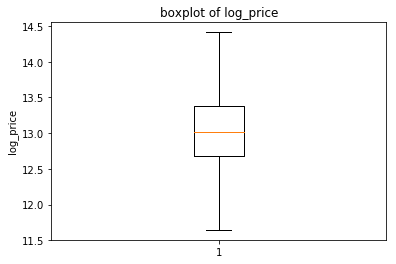

In [29]:
# The histogram of log_price shows a much more normal distribution with 11.26 as the minimum value and 
# and 15.86 as the maximum value.

# look at a box plot of the new log_price
# boxplot of log_price
plt.boxplot(df2["log_price"], 0, '')
plt.title('boxplot of log_price')
plt.ylabel('log_price')
plt.show()

In [30]:
# The boxplot of log_price also appears to be a very normal looking distribution

# look at the mean and standard distribution of log_price
norm.fit(df2.log_price)

(13.048210941923953, 0.5265426376308636)

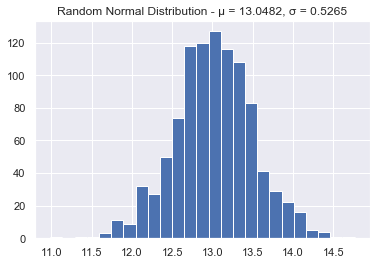

In [88]:
# Question: 
# How does the distribution of log_price compare to a randomly generated normal distribution?
# Step 1: 
# create a normally distributed random series of values using the same mean and standard deviation as log_price.

μ = 13.0482
σ = 0.5265
# pd.Series(normal(loc=μ, scale=σ, size=1000)).hist()


# revised plot
temp = pd.Series(normal(loc=μ, scale=σ, size=1000))
plt.hist(temp, bins=25, )
plt.title("Random Normal Distribution - μ = 13.0482, σ = 0.5265")
plt.show()

Text(0.5, 1.0, 'Fit results: mu = 13.05,  std = 0.53')

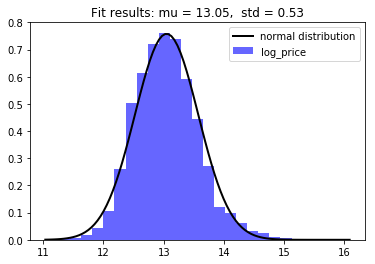

In [32]:
# Step 2:
# Overlay the probabity density graph of this distribution on top of the histrogram of log_price

# histogram of log_price with 25 bins
plt.hist(df2.log_price, bins=25, density=True, alpha=0.6, color='b', label='log_price')  


# plot the PDF (Probability Density Function) of the random normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # x is 100 values between min and max
p = norm.pdf(x, μ, σ) # create a normal distribution of values
plt.plot(x, p, 'k', linewidth=2, label='normal distribution') # plot the PDF

plt.legend()

title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title)


In [33]:
# Answer:
# log_price correlates very well with a random normal distribution.


In [34]:
# Question: 
# What can I learn from the skew and kurtosis of the distribution of log_price?

#Look at log_price curve characteristics: skewness and kurtosis
print("Skewness: %f" % df2.log_price.skew())
print("Kurtosis: %f" % df2.log_price.kurt())

Skewness: 0.431004
Kurtosis: 0.691049


In [35]:
# Answer:
# A kurtosis of less than 3 (0.69) indicates that the distribution has fewer values in the tails 
# than a perfectly normal distribution.

# A skewness of +0.43 indicates that the tail is fatter and/or longer on the right side than on the left.
# Another way of stating this is to say, there are more values in the right side tail than in the left side tail.

# look at current form of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 110 entries, date to log_price
dtypes: datetime64[ns](1), float64(9), int64(11), uint8(89)
memory usage: 5.3 MB


/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


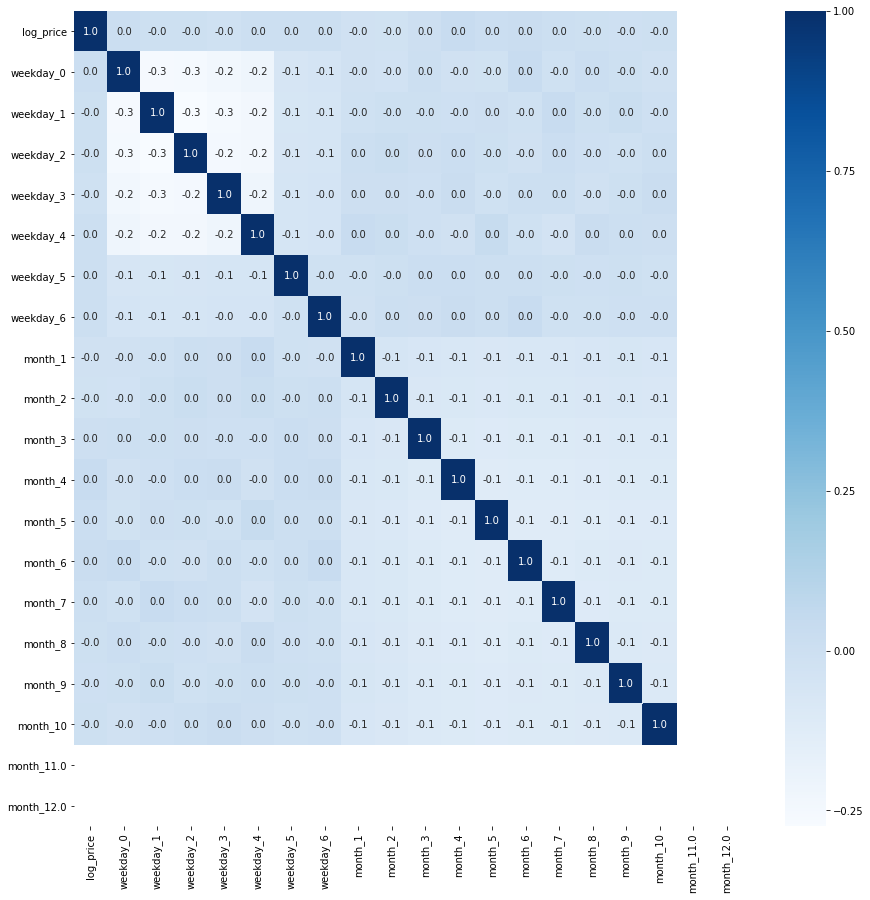

In [36]:
# Question:
# Are the newly created factors for weekday and month correlated with log_price?

# Plot a heatmap for the day_of_week and month as they correlate to log_price
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df2.loc[:,['log_price',
                             'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
                             'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 
                             'month_7', 'month_8', 'month_9', 'month_10', 'month_11.0', 'month_12.0', 
                             ]].corr(), 
                                annot=True, cmap="Blues", fmt= '.1f')
plt.show()

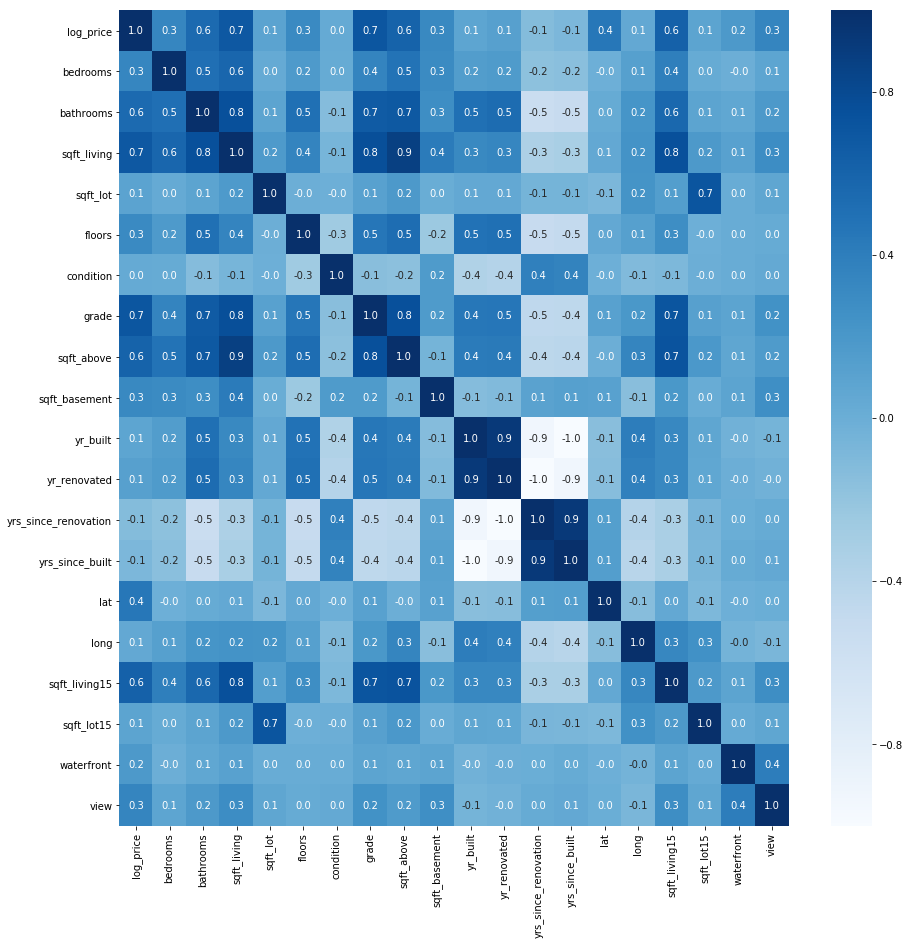

In [37]:
# Day of the week and month show no apparent correlation with log_price

# look at a heatmap for the other factors as they correlate to log_price

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df2.loc[:,['log_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                        'yrs_since_renovation', 'yrs_since_built', 'lat', 'long', 'sqft_living15', 
                        'sqft_lot15','waterfront','view', 
                        ]].corr(), annot=True, cmap="Blues", fmt= '.1f',ax=ax)
plt.show()

In [38]:
# without any modification of the independent variables, 
# the following factors have a correlation to log_price at or above .6:
# * sqft_living (.7)
# * grade (.7)
# * sqft_above (.6)
# * sqft_living15 (.6)
# * bathrooms (.6)

# these factors may also be useful
# lat (.4)
# bedrooms (.3)
# floors (.3)
# sqft_basement (.3)
# view (.3)
# waterfront (.2)


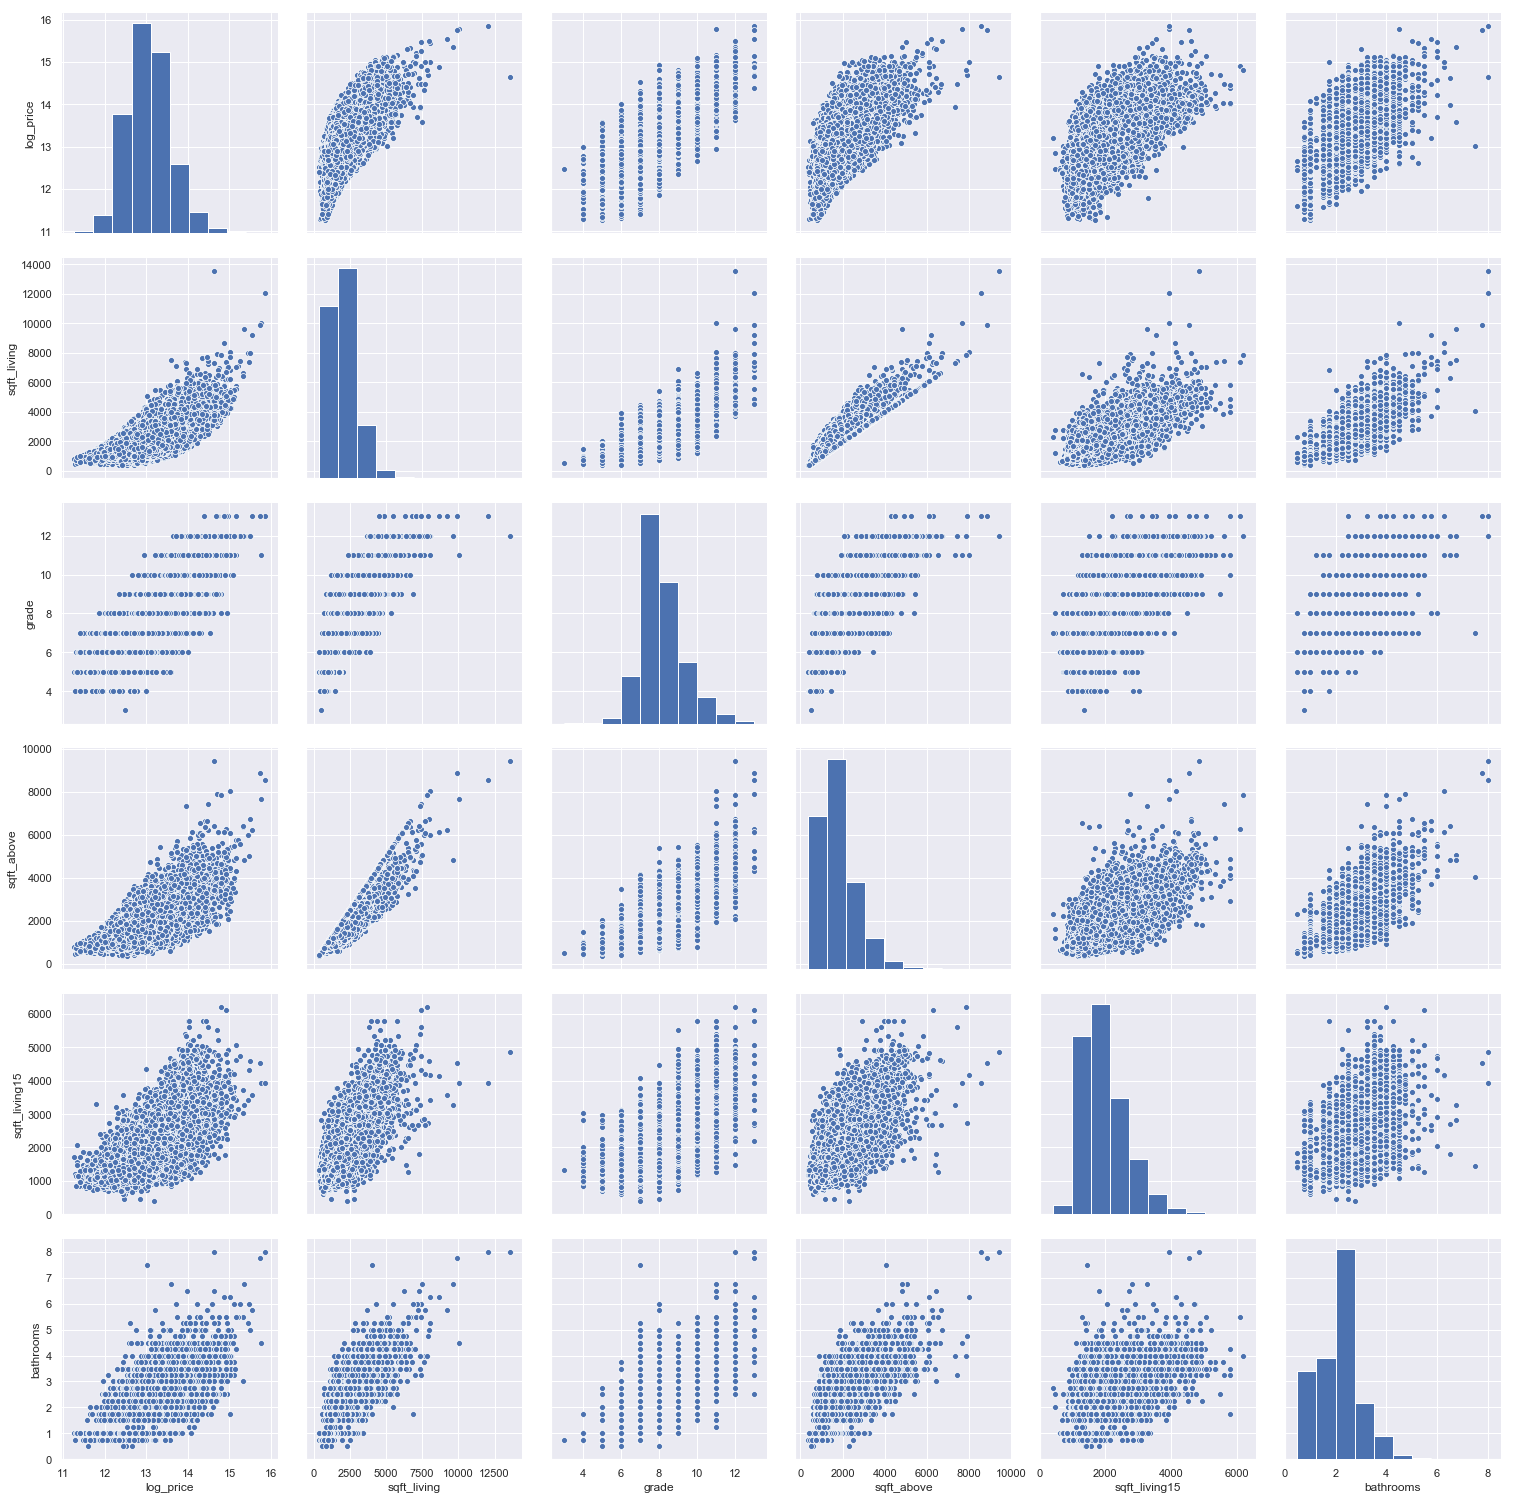

In [39]:
# Look for correlations between the top 5 factors using another method - scatterplots
sns.set()
cols = ['log_price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'] 
sns.pairplot(df2[cols], height = 3.5)

plt.show();

/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


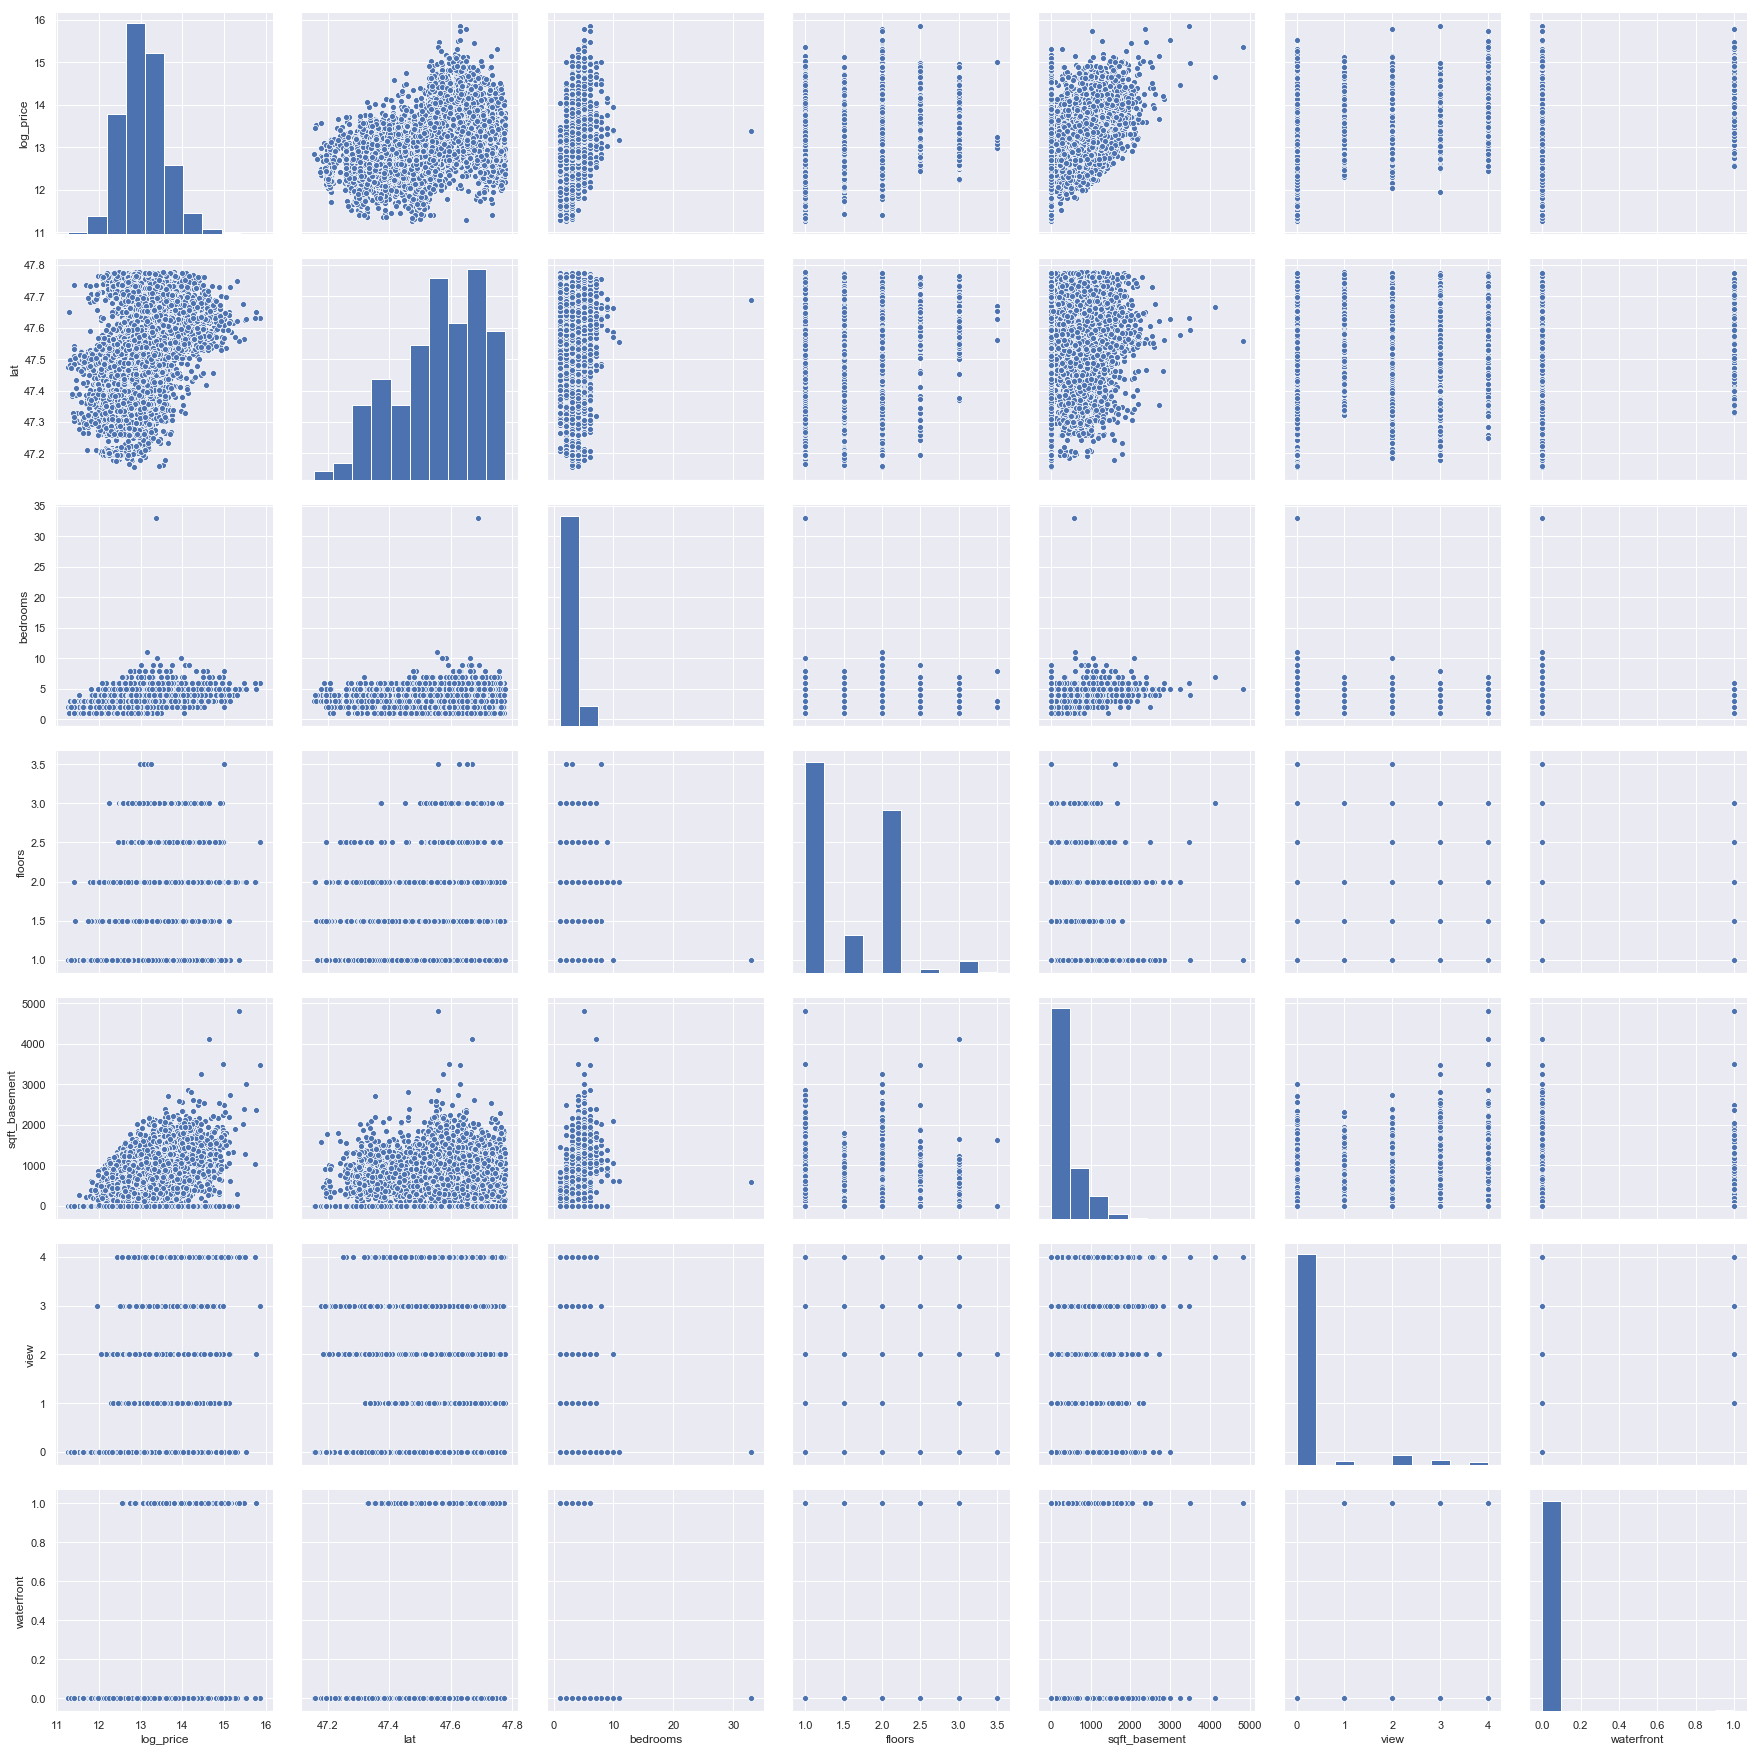

In [40]:
# all 5 of these factors show some degree of correlation to log_price when viewing the scatter plots.

# Look for correlations between the next 6 factors using scatterplots

sns.set()
cols = ['log_price', 'lat', 'bedrooms', 'floors', 'sqft_basement', 'view', 'waterfront'] 
sns.pairplot(df2[cols], height = 3.5)

plt.show();

Text(0, 0.5, 'Sales Price')

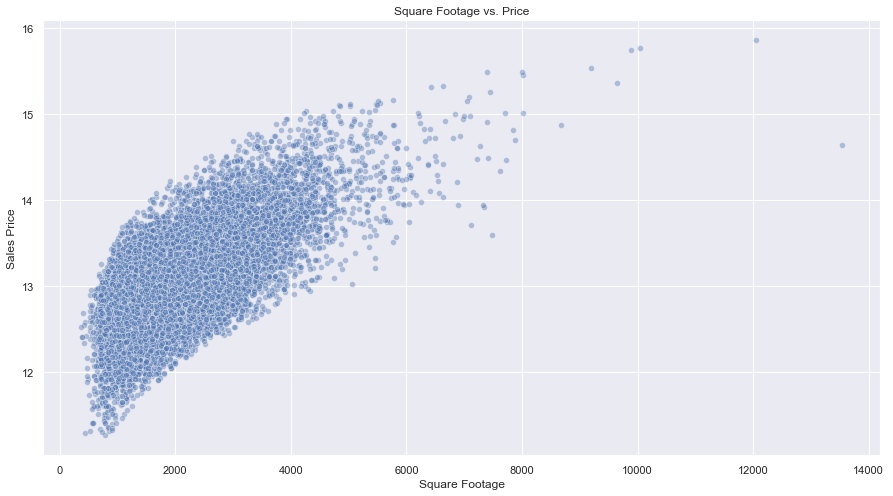

In [41]:
# scatterplot of sqft_living and price

plt.figure(figsize=(15,8))
ax = sns.scatterplot('sqft_living','log_price',data=df2, alpha=0.4)

plt.title("Square Footage vs. Price")
plt.xlabel("Square Footage")
plt.ylabel("Sales Price")

# from seaborn documentation
# seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, 
#                     hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, 
#                     markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, 
#                     ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', 
#                     ax=None, **kwargs)

Text(0.5, 1.0, 'Grade and Sales Price')

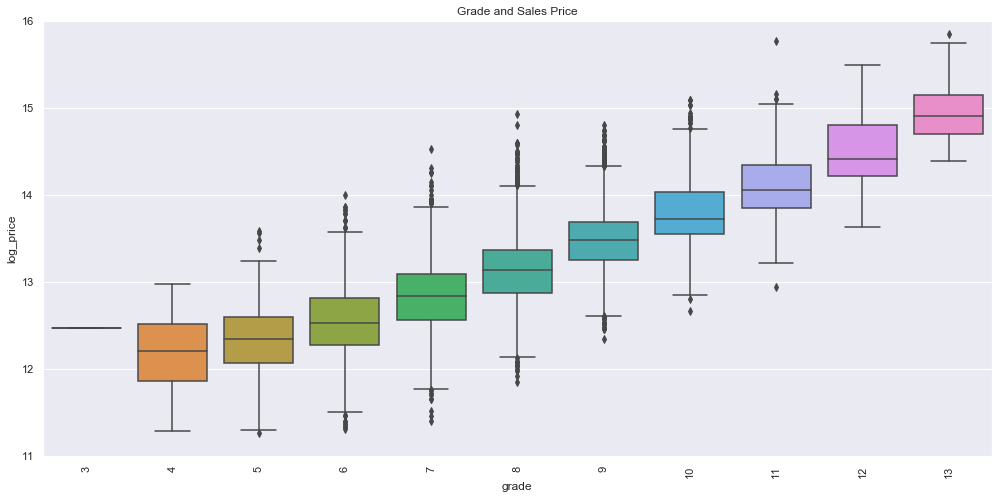

In [42]:
# in their present state, none of these 6 factors show a strong correlation 
# to log_price when viewied as scatter plots.


# try another way of looking for correlations - boxplots for the ordered factors
var = 'grade'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);
plt.title("Grade and Sales Price")

Text(0.5, 1.0, 'Bathrooms and Sales Price')

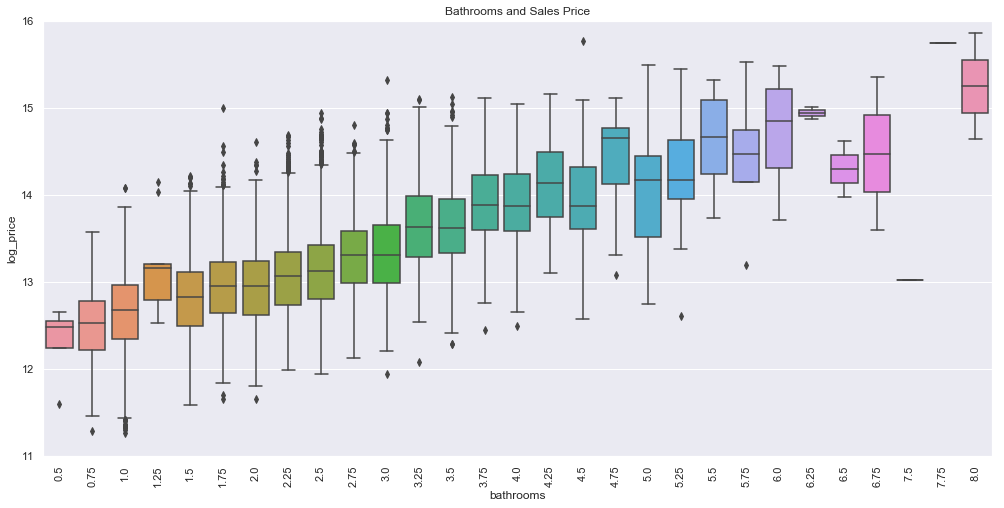

In [43]:
# grade seems to have a strong correlation to log_price, but there are many outliers. 
# The box plot shows that the middle 50% of each grade shows a very consistent correlation to log_price.

var = 'bathrooms'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);
plt.title("Bathrooms and Sales Price")

Text(0.5, 1.0, 'Bedrooms and Sales Price')

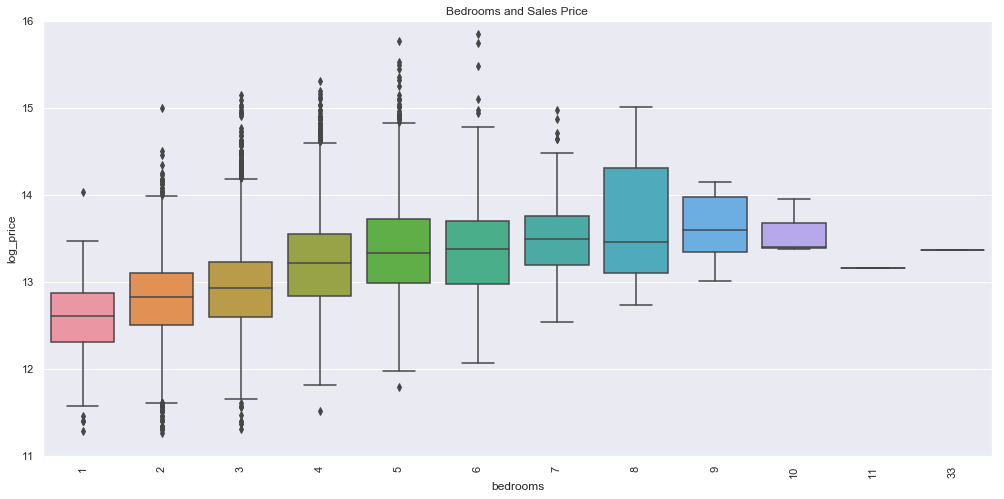

In [44]:
# the number of bathrooms shows a generally positive correlation to log_price, but with many outliers.

var = 'bedrooms'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);
plt.title("Bedrooms and Sales Price")


Text(0.5, 1.0, 'Floors and Sales Price')

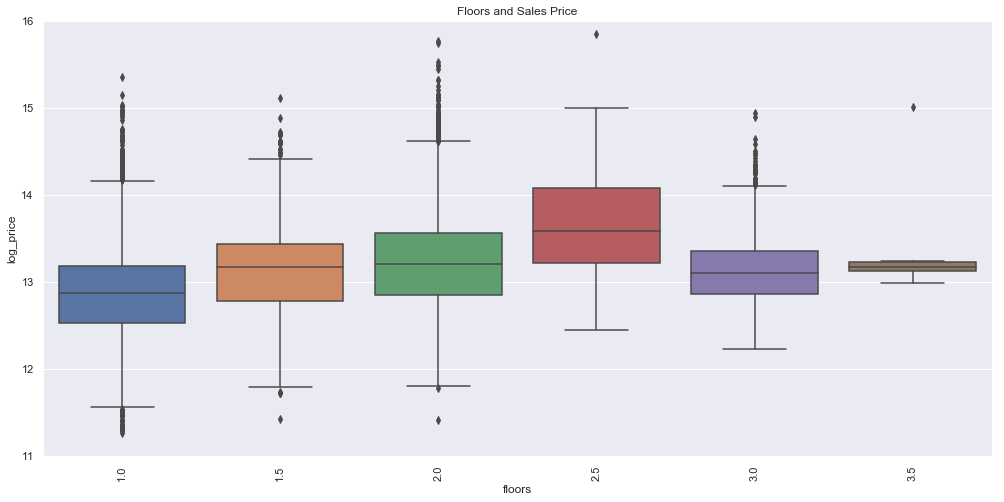

In [45]:
# bedrooms again indicates a slight correlation to log_price from values 1 to 7.
# Above 7 the correlation breaks down.

var = 'floors'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);
plt.title("Floors and Sales Price")

Text(0.5, 1.0, 'View and Sales Price')

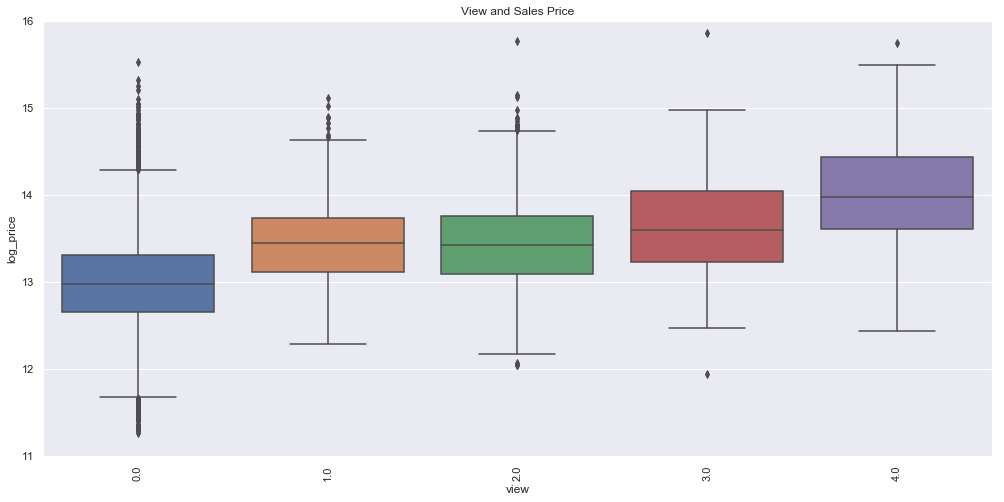

In [46]:
# floors shows a slight positive correlation to log_price for floors of 1 to 2.5, but with many outliers

var = 'view'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);
plt.title("View and Sales Price")

Text(0.5, 1.0, 'Condition and Sales Price')

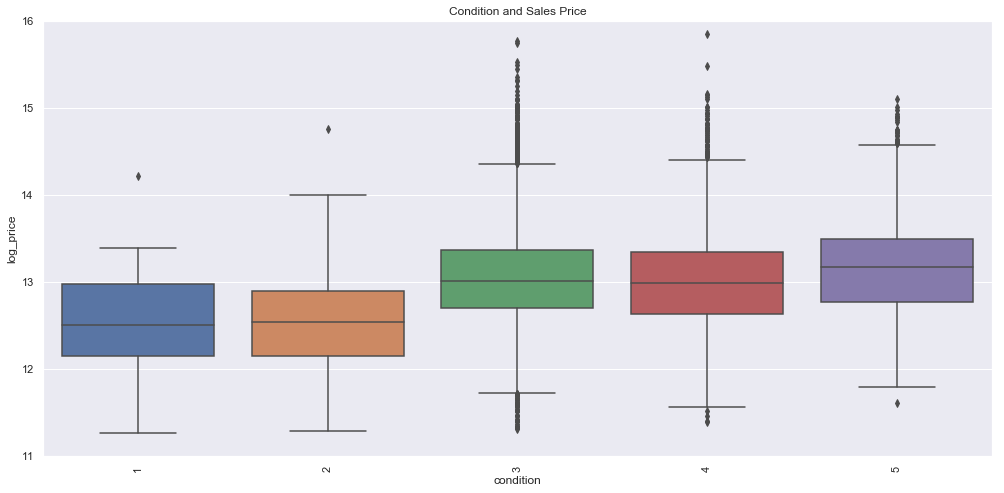

In [47]:
# view seems to have a slight correlation to log_price, but again there are many outliers. 
# The box plot shows that the median of each view level shows a slight correlation to log_price.

var = 'condition'
data = pd.concat([df2.log_price, df2[var]], axis=1)
f, ax = plt.subplots(figsize=(17, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=11, ymax=16);
plt.xticks(rotation=90);
plt.title("Condition and Sales Price")

In [48]:
# condition shows a slight positive correlation to log_price for levels 3-5 compared to levels 1 & 2.

# based on the heatmap, scatterplots, and boxplots, I am adding bedrooms, floors, and view to the factors to keep:
# make a list of the columns I am considering for use in the regressions
final_cols = ['log_price', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms', 'lat', 
        'bedrooms' , 'floors', 'view', 'condition']


In [49]:
# delete the columns not used

df2.drop([
    'date',
    'sqft_lot',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'long',
    'sqft_lot15',
    'waterfront',
    'zipcode_98001',
    'zipcode_98002',
    'zipcode_98003',
    'zipcode_98004',
    'zipcode_98005',
    'zipcode_98006',
    'zipcode_98007',
    'zipcode_98008',
    'zipcode_98010',
    'zipcode_98011',
    'zipcode_98014',
    'zipcode_98019',
    'zipcode_98022',
    'zipcode_98023',
    'zipcode_98024',
    'zipcode_98027',
    'zipcode_98028',
    'zipcode_98029',
    'zipcode_98030',
    'zipcode_98031',
    'zipcode_98032',
    'zipcode_98033',
    'zipcode_98034',
    'zipcode_98038',
    'zipcode_98039',
    'zipcode_98040',
    'zipcode_98042',
    'zipcode_98045',
    'zipcode_98052',
    'zipcode_98053',
    'zipcode_98055',
    'zipcode_98056',
    'zipcode_98058',
    'zipcode_98059',
    'zipcode_98065',
    'zipcode_98070',
    'zipcode_98072',
    'zipcode_98074',
    'zipcode_98075',
    'zipcode_98077',
    'zipcode_98092',
    'zipcode_98102',
    'zipcode_98103',
    'zipcode_98105',
    'zipcode_98106',
    'zipcode_98107',
    'zipcode_98108',
    'zipcode_98109',
    'zipcode_98112',
    'zipcode_98115',
    'zipcode_98116',
    'zipcode_98117',
    'zipcode_98118',
    'zipcode_98119',
    'zipcode_98122',
    'zipcode_98125',
    'zipcode_98126',
    'zipcode_98133',
    'zipcode_98136',
    'zipcode_98144',
    'zipcode_98146',
    'zipcode_98148',
    'zipcode_98155',
    'zipcode_98166',
    'zipcode_98168',
    'zipcode_98177',
    'zipcode_98178',
    'zipcode_98188',
    'zipcode_98198',
    'zipcode_98199',
    'weekday_0',
    'weekday_1',
    'weekday_2',
    'weekday_3',
    'weekday_4',
    'weekday_5',
    'weekday_6',
    'month_1',
    'month_10',
    'month_11',
    'month_12',
    'month_2',
    'month_3',
    'month_4',
    'month_5',
    'month_6',
    'month_7',
    'month_8',
    'month_9',
    'yrs_since_renovation',
    'yrs_since_built'], inplace=True, axis=1)

In [50]:
# look again at remaining dataframe columns
list(df2)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'lat',
 'sqft_living15',
 'log_price']

In [51]:
# look again at the columns I wanted
list(final_cols)

['log_price',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living',
 'bathrooms',
 'lat',
 'bedrooms',
 'floors',
 'view',
 'condition']

In [52]:
# df2 has only the columns that I want

# Question:
# Are any of these factors strongly related (colinearity)?

# look for colinearity between the six factors chosen, using a threshold of 0.75
abs(df2.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,lat,sqft_living15,log_price
bedrooms,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,True,False,True,False
floors,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,True,False,False,False,True,True,False,False,False
sqft_above,False,False,True,False,False,False,True,True,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,False,False,True,False


In [53]:
corr_df = abs(df2.corr()) > 0.75
corr_df.sum(axis=1)

bedrooms         1
bathrooms        2
sqft_living      5
floors           1
view             1
condition        1
grade            3
sqft_above       3
lat              1
sqft_living15    2
log_price        1
dtype: int64

In [54]:
# Answer:
# bathrooms, grade, sqft_above, and sqft_living15 are all strongly correlated to sqft_living

# drop all the factors that are strongly correlated with sqft_living
df2.drop([
    'bathrooms',
    'grade',
    'sqft_above',
    'sqft_living15',], inplace=True, axis=1)

In [55]:
# re-run the correlation test again
corr_df = abs(df2.corr()) > 0.75
corr_df.sum(axis=1)

bedrooms       1
sqft_living    1
floors         1
view           1
condition      1
lat            1
log_price      1
dtype: int64

In [56]:
# the remaining factors show no issues with colinearity

# count the missing or null values in each column
nulls = df2.isnull().sum().sort_values(ascending=False)
nulls

view           63
log_price       0
lat             0
condition       0
floors          0
sqft_living     0
bedrooms        0
dtype: int64

In [57]:
# there is still 63 records with null for view

# look at df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
bedrooms       21597 non-null int64
sqft_living    21597 non-null int64
floors         21597 non-null float64
view           21534 non-null float64
condition      21597 non-null int64
lat            21597 non-null float64
log_price      21597 non-null float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [58]:
# because 63 is such a small proportion of the records, drop the 63 records where view is null

# from the pandas documentation
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

df2.dropna(subset=['view'], inplace=True)

In [59]:
# look at df2 columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 7 columns):
bedrooms       21534 non-null int64
sqft_living    21534 non-null int64
floors         21534 non-null float64
view           21534 non-null float64
condition      21534 non-null int64
lat            21534 non-null float64
log_price      21534 non-null float64
dtypes: float64(4), int64(3)
memory usage: 1.3 MB


In [60]:
# next, do some regressions using the final prdeictors and target

# create matrix X and y containing the predictors and target for the model. 
y = df2['log_price'] # dependent varialbe
X = df2.drop(['log_price'], axis=1) # independent variables
X.shape

(21534, 6)

In [61]:
X.head() # look at the first five records in X

,bedrooms,sqft_living,floors,view,condition,lat
0,3,1180,1.0,0.0,3,47.5112
1,3,2570,2.0,0.0,3,47.7210
2,2,770,1.0,0.0,3,47.7379
3,4,1960,1.0,0.0,5,47.5208
4,3,1680,1.0,0.0,3,47.6168


In [62]:
# look at summary stats for the factors
X.describe()

,bedrooms,sqft_living,floors,view,condition,lat
count,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,3.373038,2079.827854,1.494126,0.233863,3.409724,47.560180
std,0.926410,917.446520,0.539806,0.765686,0.650654,0.138528
min,1.000000,370.000000,1.000000,0.000000,1.000000,47.155900
25%,3.000000,1430.000000,1.000000,0.000000,3.000000,47.471200
50%,3.000000,1910.000000,1.500000,0.000000,3.000000,47.571900
75%,4.000000,2550.000000,2.000000,0.000000,4.000000,47.678100
max,33.000000,13540.000000,3.500000,4.000000,5.000000,47.777600


In [63]:
y.shape

(21534,)

In [64]:
y.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: log_price, dtype: float64

In [65]:
# look at summary statistics for the target
y.describe()

count    21534.000000
mean        13.048040
std          0.526307
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: log_price, dtype: float64

In [66]:
# Using the final six factors, calculate r-squared, intercept, slope, and p-value

col_names = ['bedrooms', 'sqft_living', 'floors', 'view', 'condition', 'lat']

# make an array of statistical results for each of the 6 factors
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

# loop through the factors, calculating r_squared, intercept, slope, and p-value
for idx, val in enumerate(col_names):
#     print ("log_price~" + val)
#     print ("------------------------------")
    f = 'log_price~' + val  # string for the formula
    model = smf.ols(formula=f, data=df2).fit()  # create the model
    X_new = pd.DataFrame({val: [df2[val].min(), df2[val].max()]});  # get min and max for the factor
    preds = model.predict(X_new)  # get the predictions
    # add the values to the results array
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results_log[idx+1])
#     print("\n")

In [67]:
# look at the results of the calculations
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.117505,12.3912,0.194744,0
2,sqft_living,0.482727,12.2191,0.000398574,0
3,floors,0.0964055,12.5957,0.302728,0
4,view,0.119346,12.9925,0.237461,0
5,condition,0.00147454,12.9421,0.0310611,1.73334e-08
6,lat,0.201717,-68.1071,1.70637,0


In [68]:
# r-squared values in ascending order:
# condition sticks our with a very low r-squared value of 0.001
# floors, view, and bedrooms also have quite low r-squared values (0.096 to 0.119)
# lat is next with r-squared of 0.201
# sqft_living is last with r-squared of 0.483 

# compare predictions using from 1 to 6 of these features, using them from lowest r-squared to highest 
# r-squared value. To facilitate this I will rearrange the order of the columns.

column_order = cols = ['condition', 'floors', 'bedrooms', 'view', 'lat', 'sqft_living']

X = X.ix[:, cols]
X

/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


,condition,floors,bedrooms,view,lat,sqft_living
0,3,1.0,3,0.0,47.5112,1180
1,3,2.0,3,0.0,47.7210,2570
2,3,1.0,2,0.0,47.7379,770
3,5,1.0,4,0.0,47.5208,1960
4,3,1.0,3,0.0,47.6168,1680
5,3,1.0,4,0.0,47.6561,5420
6,3,2.0,3,0.0,47.3097,1715
8,3,1.0,3,0.0,47.5123,1780
9,3,2.0,3,0.0,47.3684,1890
10,3,1.0,3,0.0,47.6007,3560


In [69]:
# imports for the regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [70]:
r_list = []
adj_r_list = []
list_n = list(range(1,7,1))  # try 1,2,3,4,5 and 6 factors
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))  
    # Per Jeff, some methods in sklearn require this format:  y.values.reshape(-1,1)
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print('Using factor(s): ')
    print(selected_columns)
    print('r-squared:')
    print(r_squared)
    print("---")
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('adjusted-r-squared:')
    print(adjusted_r_squared)
    print('----------------------')
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

Using factor(s): 
Index(['lat'], dtype='object')
r-squared:
0.2017174478033179
---
adjusted-r-squared:
0.20149495069210033
----------------------
Using factor(s): 
Index(['floors', 'lat'], dtype='object')
r-squared:
0.28503598410516073
---
adjusted-r-squared:
0.28483670951532614
----------------------
Using factor(s): 
Index(['floors', 'view', 'lat'], dtype='object')
r-squared:
0.39707097980224126
---
adjusted-r-squared:
0.3969029315780954
----------------------
Using factor(s): 
Index(['floors', 'bedrooms', 'view', 'lat'], dtype='object')
r-squared:
0.47358898972220276
---
adjusted-r-squared:
0.4734422685784453
----------------------
Using factor(s): 
Index(['condition', 'floors', 'bedrooms', 'view', 'lat'], dtype='object')
r-squared:
0.48126598381808716
---
adjusted-r-squared:
0.481121402404184
----------------------
Using factor(s): 
Index(['condition', 'floors', 'bedrooms', 'view', 'lat', 'sqft_living'], dtype='object')
r-squared:
0.6942628973799597
---
adjusted-r-squared:
0.694177

In [71]:
# Both r-squared and adjusted r-squared increase as additional factors are used.


In [72]:
# compute Mean Squared Error using 1 to 6 factors
# try using MSE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

MSE_test = []
MSE_train = []
list_n = list(range(1,7,1))  # try 1,2,3,4,5 and 6 factors
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print ('Using {} feature(s):'.format(n))
    print(selected_columns)
    print('MSE train:')
    print(mse_train)
    print('---')
    print('MSE test:')
    print(mse_test)
    print('----------------------')
MSE_test.append(mse_test)
MSE_train.append(mse_train)

Using 1 feature(s):
Index(['lat'], dtype='object')
MSE train:
0.2194517360816647
---
MSE test:
0.22776030750889306
----------------------
Using 2 feature(s):
Index(['floors', 'lat'], dtype='object')
MSE train:
0.19655164156295105
---
MSE test:
0.20397918810073698
----------------------
Using 3 feature(s):
Index(['floors', 'view', 'lat'], dtype='object')
MSE train:
0.166302764375129
---
MSE test:
0.1698175654641735
----------------------
Using 4 feature(s):
Index(['floors', 'bedrooms', 'view', 'lat'], dtype='object')
MSE train:
0.14575318325696343
---
MSE test:
0.1461089554004613
----------------------
Using 5 feature(s):
Index(['condition', 'floors', 'bedrooms', 'view', 'lat'], dtype='object')
MSE train:
0.1436509214231136
---
MSE test:
0.14389092951852545
----------------------
Using 6 feature(s):
Index(['condition', 'floors', 'bedrooms', 'view', 'lat', 'sqft_living'], dtype='object')
MSE train:
0.08466110198229702
---
MSE test:
0.08480184948802055
----------------------


In [73]:
# MSE lowers after each addition of an additional factor

In [74]:
# cross validation using negative mean squared error
# split data into 5 folds, train on 4, test on the one held out

# selected_columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat']

cv_5_results = []
# cv_5_results = cross_val_score(linreg, X[selected_columns], y, cv=5, scoring="neg_mean_squared_error")
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")


# r-squared and others are options for scoring
# neg_mean_squared_error * -1 = MSE

# look at the 5 values
print('results of 5 runs of negative mean squared error:')
print(cv_5_results)
print(' ')
# get the mean of the 5 trials
print('mean of the 5 runs:')
print(np.mean(cv_5_results))

results of 5 runs of negative mean squared error:
[-0.08839554 -0.08611114 -0.08643599 -0.08707192 -0.07585445]
 
mean of the 5 runs:
-0.08477380702898582


In [75]:
# split data into 10 folds, train on 9, test on the remaining one

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# selected_columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat']

cv_10_results = []
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

# look at the 10 values
print('results of 10 runs of negative mean squared error:')
print(cv_10_results)
print(' ')
# get the mean of the 10 trials
print('mean of the 10 runs:')
print(np.mean(cv_10_results))

results of 10 runs of negative mean squared error:
[-0.08345501 -0.09333484 -0.08648768 -0.08578559 -0.08198452 -0.09087267
 -0.0868426  -0.08736359 -0.08359639 -0.06800264]
 
mean of the 10 runs:
-0.08477255233738426


In [76]:
# nearly identical results using 5 or 10 folds

In [77]:
# create a model using all 6 factors - MODEL A (no tuning of features)
# this is the best performing model

model = 'log_price ~ bedrooms + sqft_living + floors + view + condition + lat'
smf.ols(formula=model, data=df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     8147.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:03:59   Log-Likelihood:                -3973.7
No. Observations:               21534   AIC:                             7961.
Df Residuals:                   21527   BIC:                             8017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -62.4202      0.683    -91.363      0.000     -63.759     -61.081
bedrooms       -0.0271      0.003    -10.228      0.000      -0.032      -0.022
sqft_living     0.0004   2.93e-06    122.463      0.000       0.000       0.000
floors          0.0973      0.004     23.858      0.000       0.089       0.105
view            0.1116      0.003     40.875      0.000       0.106       0.117
condition       0.0829      0.003     26.097      0.000       0.077       0.089
lat             1.5635      0.014    108.849      0.000       1.535       1.592
==============================================================================
Omnibus:                      645.564   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1714.843
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                       4.381   Cond. No.                     7.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# experiment - try making sqft_living a log value
df3 = df2.assign(log_sqft_living = np.log(df2['sqft_living']))

df3.describe()

,bedrooms,sqft_living,floors,view,condition,lat,log_price,log_sqft_living
count,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,3.373038,2079.827854,1.494126,0.233863,3.409724,47.560180,13.048040,7.550516
std,0.926410,917.446520,0.539806,0.765686,0.650654,0.138528,0.526307,0.424158
min,1.000000,370.000000,1.000000,0.000000,1.000000,47.155900,11.264464,5.913503
25%,3.000000,1430.000000,1.000000,0.000000,3.000000,47.471200,12.682307,7.265430
50%,3.000000,1910.000000,1.500000,0.000000,3.000000,47.571900,13.017003,7.554859
75%,4.000000,2550.000000,2.000000,0.000000,4.000000,47.678100,13.377006,7.843849
max,33.000000,13540.000000,3.500000,4.000000,5.000000,47.777600,15.856731,9.513404


In [79]:
# create a model using all 6 factors - MODEL B (sqft_living as a log scale)

model = 'log_price ~ log_sqft_living + floors + view + condition + lat'
smf.ols(formula=model, data=df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     9185.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:03:59   Log-Likelihood:                -4436.2
No. Observations:               21534   AIC:                             8884.
Df Residuals:                   21528   BIC:                             8932.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -69.0692      0.697    -99.118      0.000     -70.435     -67.703
log_sqft_living     0.7200      0.005    135.496      0.000       0.710       0.730
floors              0.0926      0.004     22.082      0.000       0.084       0.101
view                0.1331      0.003     48.604      0.000       0.128       0.138
condition           0.0729      0.003     22.524      0.000       0.067       0.079
lat                 1.6035      0.015    109.452      0.000       1.575       1.632
==============================================================================
Omnibus:                      471.121   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.545
Skew:                           0.271   Prob(JB):                    7.27e-138
Kurtosis:                       3.641   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# R-squared actually declined using log_sqft_living instead of sqft_living
# Skew increased and Kurtosis decreased.

# experiment - try normalizing lat
df4 = df3.assign(norm_lat = (df3.lat - df3.lat.mean()) / (df3.lat.max() - df3.lat.min()))

df4.describe()

,bedrooms,sqft_living,floors,view,condition,lat,log_price,log_sqft_living,norm_lat
count,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04
mean,3.373038,2079.827854,1.494126,0.233863,3.409724,47.560180,13.048040,7.550516,-1.207748e-15
std,0.926410,917.446520,0.539806,0.765686,0.650654,0.138528,0.526307,0.424158,2.228215e-01
min,1.000000,370.000000,1.000000,0.000000,1.000000,47.155900,11.264464,5.913503,-6.502810e-01
25%,3.000000,1430.000000,1.000000,0.000000,3.000000,47.471200,12.682307,7.265430,-1.431232e-01
50%,3.000000,1910.000000,1.500000,0.000000,3.000000,47.571900,13.017003,7.554859,1.885200e-02
75%,4.000000,2550.000000,2.000000,0.000000,4.000000,47.678100,13.377006,7.843849,1.896739e-01
max,33.000000,13540.000000,3.500000,4.000000,5.000000,47.777600,15.856731,9.513404,3.497190e-01


In [81]:
# create a model using all 6 factors - MODEL C (using normalized lat)

model = 'log_price ~ sqft_living + floors + view + condition + norm_lat'
smf.ols(formula=model, data=df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     9709.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:03:59   Log-Likelihood:                -4025.8
No. Observations:               21534   AIC:                             8064.
Df Residuals:                   21528   BIC:                             8112.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.8886      0.014    858.085      0.000      11.861      11.916
sqft_living     0.0003   2.42e-06    141.098      0.000       0.000       0.000
floors          0.0983      0.004     24.037      0.000       0.090       0.106
view            0.1148      0.003     42.238      0.000       0.109       0.120
condition       0.0805      0.003     25.352      0.000       0.074       0.087
norm_lat        0.9766      0.009    109.230      0.000       0.959       0.994
==============================================================================
Omnibus:                      584.767   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.600
Skew:                           0.048   Prob(JB):                         0.00
Kurtosis:                       4.271   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# This performance is very similar to the results of the model with no feature tuning.

# experiment - try normalizing sqft_living
df5 = df3.assign(norm_sqft_living = (df3.sqft_living - df3.sqft_living.mean()) / (df3.sqft_living.max() - df3.sqft_living.min()))

df5.describe()

,bedrooms,sqft_living,floors,view,condition,lat,log_price,log_sqft_living,norm_sqft_living
count,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04
mean,3.373038,2079.827854,1.494126,0.233863,3.409724,47.560180,13.048040,7.550516,6.269301e-18
std,0.926410,917.446520,0.539806,0.765686,0.650654,0.138528,0.526307,0.424158,6.966185e-02
min,1.000000,370.000000,1.000000,0.000000,1.000000,47.155900,11.264464,5.913503,-1.298275e-01
25%,3.000000,1430.000000,1.000000,0.000000,3.000000,47.471200,12.682307,7.265430,-4.934152e-02
50%,3.000000,1910.000000,1.500000,0.000000,3.000000,47.571900,13.017003,7.554859,-1.289505e-02
75%,4.000000,2550.000000,2.000000,0.000000,4.000000,47.678100,13.377006,7.843849,3.570024e-02
max,33.000000,13540.000000,3.500000,4.000000,5.000000,47.777600,15.856731,9.513404,8.701725e-01


In [83]:
# create a model using all 6 factors - MODEL D (normalized sqft_living)

model = 'log_price ~ norm_sqft_living + floors + view + condition + lat'
smf.ols(formula=model, data=df5).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     9709.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:04:00   Log-Likelihood:                -4025.8
No. Observations:               21534   AIC:                             8064.
Df Residuals:                   21528   BIC:                             8112.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -62.1064      0.684    -90.807      0.000     -63.447     -60.766
norm_sqft_living     4.5047      0.032    141.098      0.000       4.442       4.567
floors               0.0983      0.004     24.037      0.000       0.090       0.106
view                 0.1148      0.003     42.238      0.000       0.109       0.120
condition            0.0805      0.003     25.352      0.000       0.074       0.087
lat                  1.5708      0.014    109.230      0.000       1.543       1.599
==============================================================================
Omnibus:                      584.767   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.600
Skew:                           0.048   Prob(JB):                         0.00
Kurtosis:                       4.271   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# Again very similar results for r-squared to the version with no feature tuning.
# Skew increased slightly and Kurtosis decreased slightly.

# R-squared and adjusted R-squared are very similar in all of these models.

In [85]:
# GET THE ACTUAL SALE PRICE AND PREDICTED SALE PRICE FOR 5 RANDOM RECORDS

records = np.random.random_integers(0, 21533, 5) # generate 5 random integers for the keys of the records

# create the model
formula_string = 'log_price ~ bedrooms + sqft_living + floors + view + condition + lat'
model = smf.ols(formula=formula_string, data=df2)
results = model.fit()

df2['actual_price'] = np.exp(df2['log_price'])
# df2['predicted_price'] = np.exp(test_predictions['predicted_price'])
df2['predicted_price'] = np.exp(results.predict())

df2.head()

/Users/giovanni/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 21533 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,bedrooms,sqft_living,floors,view,condition,lat,log_price,actual_price,predicted_price
0,3,1180,1.0,0.0,3,47.5112,12.309982,221900.0,282210.385960
1,3,2570,2.0,0.0,3,47.7210,13.195614,538000.0,711233.366669
2,2,770,1.0,0.0,3,47.7379,12.100712,180000.0,356749.096905
3,4,1960,1.0,0.0,5,47.5208,13.311329,604000.0,435398.135537
4,3,1680,1.0,0.0,3,47.6168,13.142166,510000.0,398317.728418


In [86]:
# create a model using all 6 factors - MODEL A (no tuning of features)
# restating the best performing model
# 6 factors were used to predict the log of price

model = 'log_price ~ bedrooms + sqft_living + floors + view + condition + lat'
smf.ols(formula=model, data=df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     8147.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:04:00   Log-Likelihood:                -3973.7
No. Observations:               21534   AIC:                             7961.
Df Residuals:                   21527   BIC:                             8017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -62.4202      0.683    -91.363      0.000     -63.759     -61.081
bedrooms       -0.0271      0.003    -10.228      0.000      -0.032      -0.022
sqft_living     0.0004   2.93e-06    122.463      0.000       0.000       0.000
floors          0.0973      0.004     23.858      0.000       0.089       0.105
view            0.1116      0.003     40.875      0.000       0.106       0.117
condition       0.0829      0.003     26.097      0.000       0.077       0.089
lat             1.5635      0.014    108.849      0.000       1.535       1.592
==============================================================================
Omnibus:                      645.564   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1714.843
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                       4.381   Cond. No.                     7.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# Conclusions:
# Best results were obtained by converting the target variable to a log scale and leaving the six
# selected features as-is. 

# Statistics for final performance of the model:
# R-squared: 0.694
# MSE: 0.085
# Skew: 0.035
# Kurtosis: 4.381

# sqft_living has the lowest coefficient at 0.0004 and the lowest standard error at 0.000003
# bedrooms has the second lowest coefficient and standard error (-0.0271 and 0.0003)
# these two factors are the most useful in predicting sales price.
